In [1]:
import pandas as pd
import glob
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import math

def plot_dataframes(df_list, col='vxCG', figsize=(15, 15)):
    if not isinstance(df_list, list):
        raise TypeError('df_list must be a list of dataframes')
    
    n = len(df_list)
    sqrt_n = int(math.ceil(n**0.5))
    fig, axs = plt.subplots(sqrt_n, sqrt_n, figsize=figsize)

    for i, df in enumerate(df_list):
        ax = axs[i // sqrt_n, i % sqrt_n]
        df[col].plot(ax=ax)
        ax.set_title(f'Dataframe {i+1}')

    # Remove empty subplots
    if n < sqrt_n**2:
        for i in range(n, sqrt_n**2):
            fig.delaxes(axs.flatten()[i])

    plt.tight_layout()
    plt.show()

In [3]:
train_dflist = []
for i, fname in enumerate(sorted(glob.glob("data/2013_Targa_Sixty_Six" + "/*.csv"))):
    train_dflist.append(pd.read_csv(fname, sep=","))
    
test_dflist = []
for i, fname in enumerate(sorted(glob.glob("data/2013_Laguna_Seca" + "/*.csv"))):
    test_dflist.append(pd.read_csv(fname, sep=","))

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from pipelist import ApplyThreshold, ConcatDataFrames, SeparateDataFrames
from sklearn import set_config
set_config(display="diagram")

ct = ColumnTransformer([("stand", StandardScaler(), ["vxCG", "vyCG"]),
                        ("minmax", MinMaxScaler(), ["sideSlip"])],
                       remainder="passthrough",
                       verbose_feature_names_out=False)

pipelist1 = Pipeline([('threshold', ApplyThreshold(threshold=10, by="vxCG", seq_length=10)), 
                     ('concat', ConcatDataFrames()), 
                     ('column transformer', ct.set_output(transform="pandas")),
                     ('separate', SeparateDataFrames())
                     ])

pipelist1

Pipeline(steps=[('threshold',
                 ApplyThreshold(by='vxCG', seq_length=10, threshold=10)),
                ('concat', ConcatDataFrames()),
                ('column transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stand', StandardScaler(),
                                                  ['vxCG', 'vyCG']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['sideSlip'])],
                                   verbose_feature_names_out=False)),
                ('separate', SeparateDataFrames())])

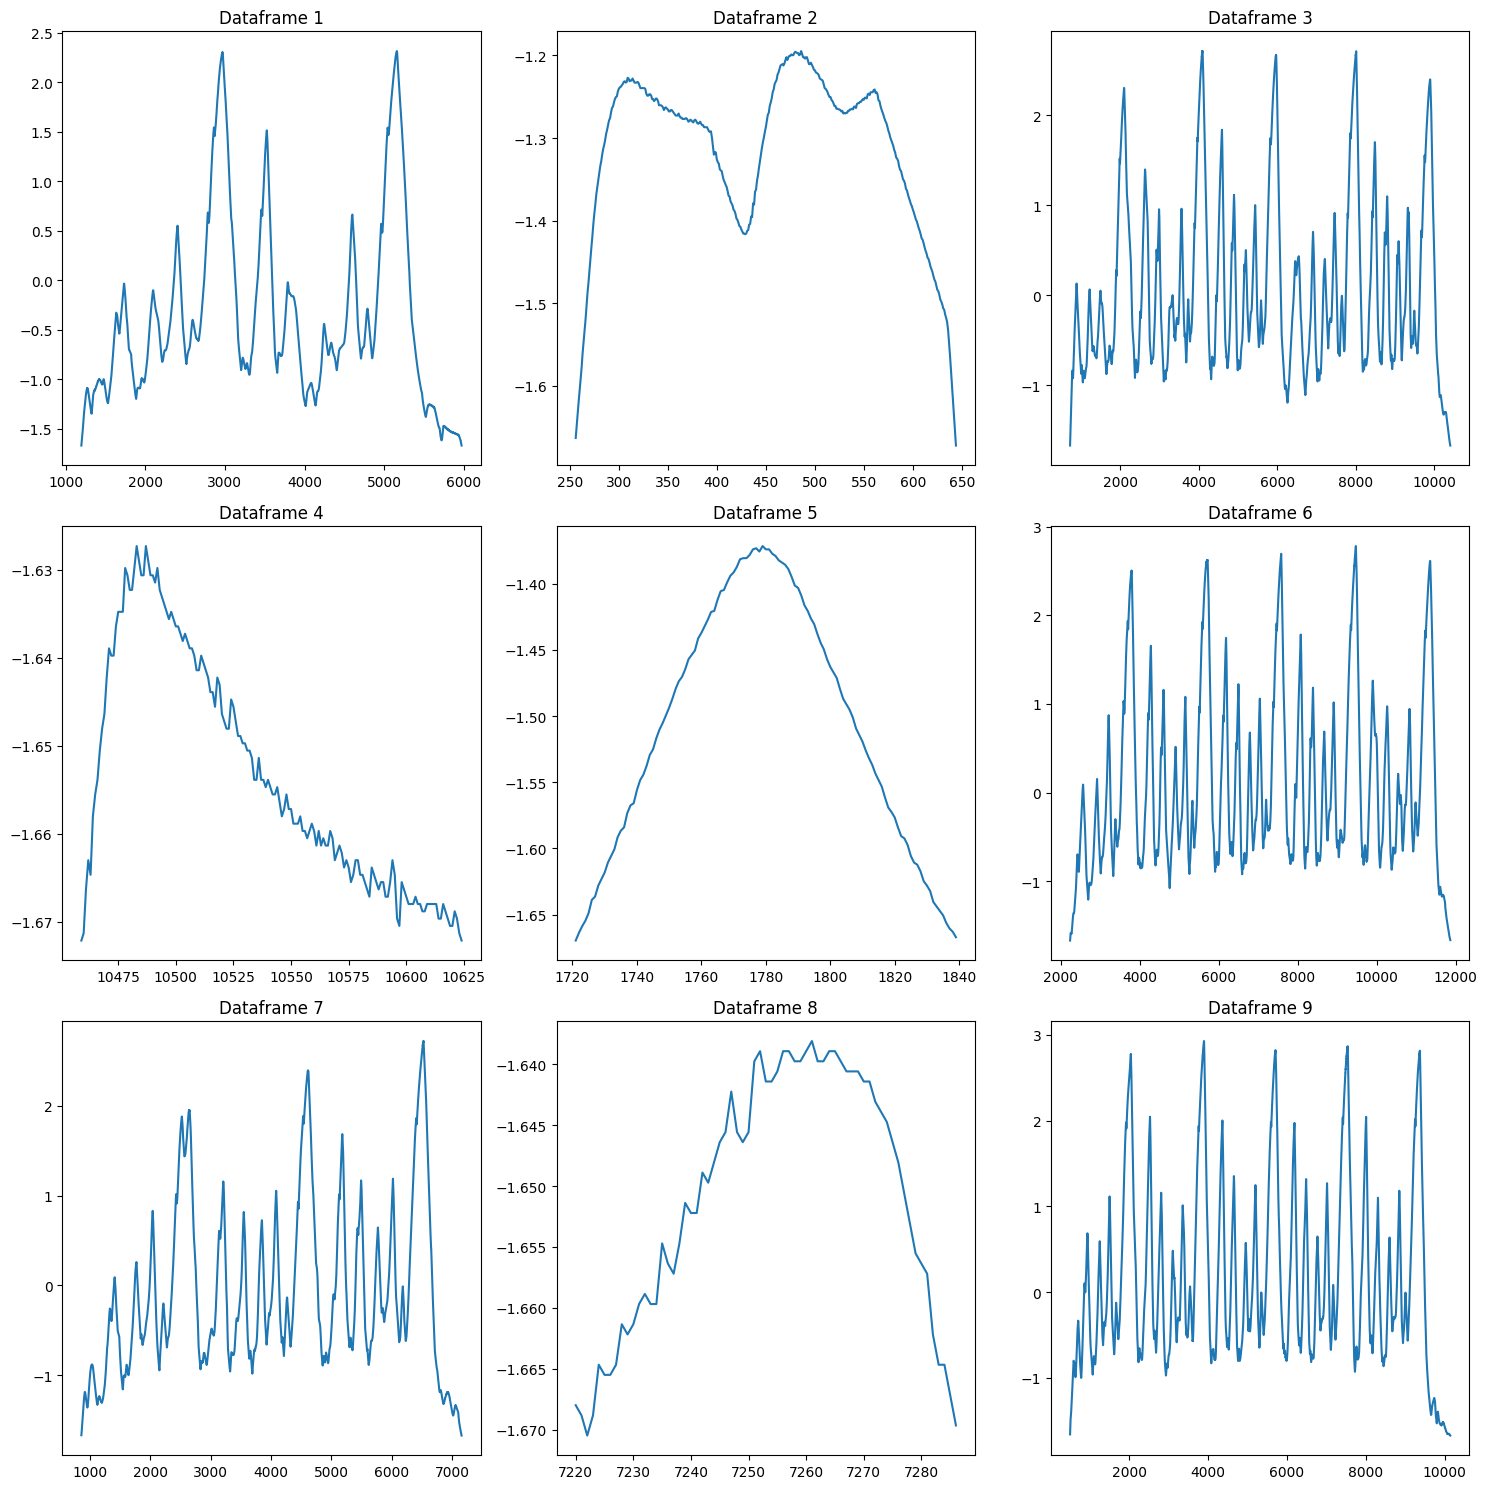

In [5]:
trainlist = pipelist1.fit_transform(train_dflist)
plot_dataframes(trainlist, figsize=(15,15))

In [6]:
pipelist2 = Pipeline([('concat', ConcatDataFrames()), 
                     ('column transformer', ct.set_output(transform="pandas")),
                     ('separate', SeparateDataFrames())
                    ])

pipelist2

Pipeline(steps=[('concat', ConcatDataFrames()),
                ('column transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stand', StandardScaler(),
                                                  ['vxCG', 'vyCG']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['sideSlip'])],
                                   verbose_feature_names_out=False)),
                ('separate', SeparateDataFrames())])

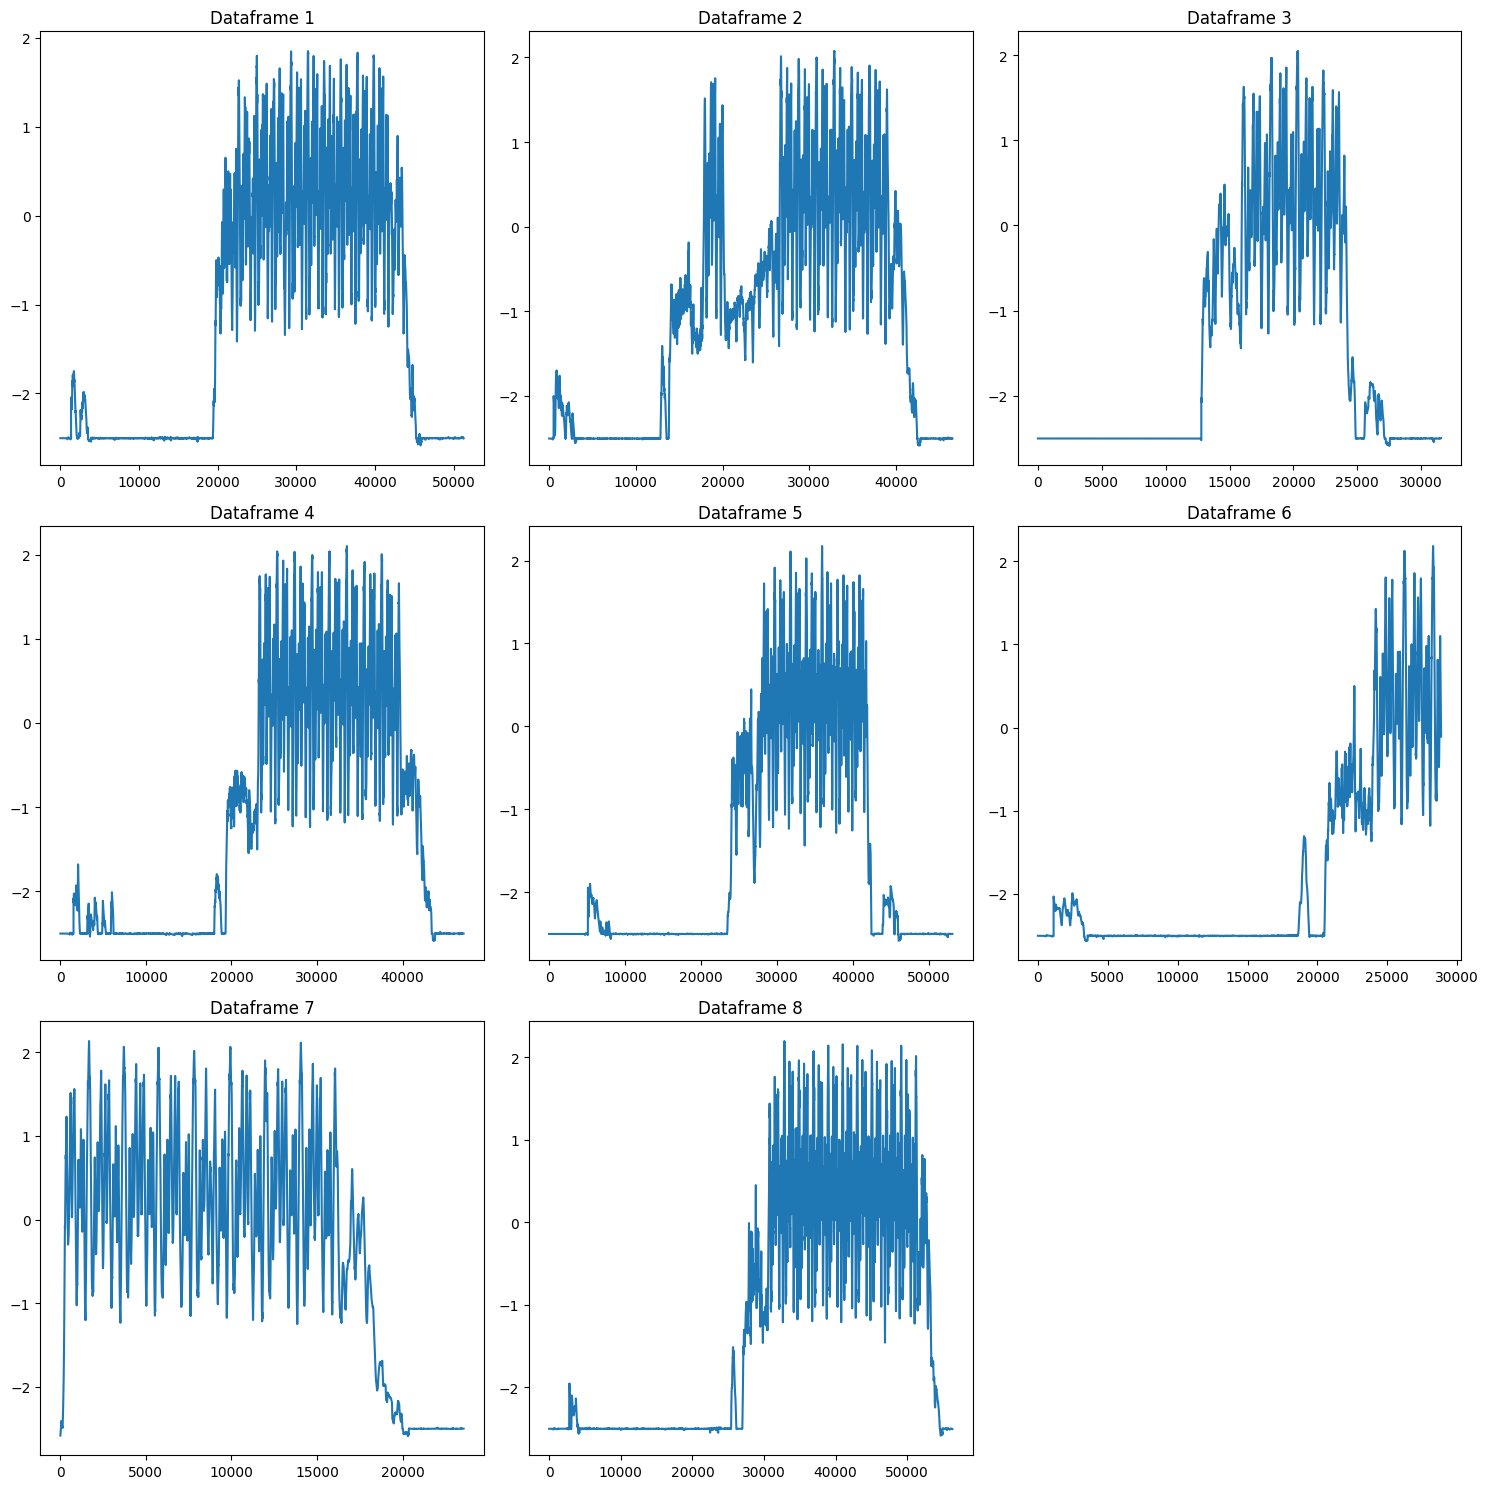

In [7]:
testlist = pipelist2.transform(test_dflist)
plot_dataframes(testlist, figsize=(15,15))